# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
rawData.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-06-27


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
def worstPlaces(state=None, count=30):
    if state == None:
        count = 30
        print(f"Counties with the most new cases in US for {today}:")
        display(latest.sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in US for {today}:")
        display(latest.sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))
    else:
        print(f"Counties with the most new cases in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))


In [7]:
worstPlaces()

Counties with the most new cases in US for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,42374,741,2748,23
1,California,Los Angeles,95371,3285,2139,18
2,Florida,Miami-Dade,31561,947,1366,1
3,Florida,Hillsborough,9130,132,1112,0
4,Florida,Orange,8836,55,989,0
5,Nevada,Clark,13174,410,970,2
6,Texas,Harris,29163,369,908,8
7,Texas,Bexar,9664,107,795,2
8,Texas,Travis,7825,117,728,1
9,Florida,Broward,14046,382,726,1


Counties with the most new deaths in US for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,42374,741,2748,23
1,New York,New York City,219157,21913,358,20
2,California,Los Angeles,95371,3285,2139,18
3,Illinois,Cook,89407,4536,339,10
4,Massachusetts,Middlesex,23859,1849,73,10
5,Ohio,Franklin,8694,392,183,9
6,Texas,Harris,29163,369,908,8
7,Florida,Pinellas,5713,149,614,8
8,California,Imperial,6041,80,203,8
9,Texas,Dallas,19595,351,561,7


In [8]:
worstPlaces("California")

Counties with the most new cases in California for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,95371,3285,2139,18
1,California,Orange,12659,323,438,0
2,California,San Diego,12900,360,436,2
3,California,Riverside,15858,438,215,0
4,California,Imperial,6041,80,203,8
5,California,Santa Barbara,2784,28,118,0
6,California,Marin,1746,18,110,0
7,California,Fresno,4474,72,100,0
8,California,Ventura,2444,44,98,0
9,California,Sonoma,1092,5,86,0


Counties with the most new deaths in California for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,95371,3285,2139,18
1,California,Imperial,6041,80,203,8
2,California,San Diego,12900,360,436,2
3,California,San Francisco,3471,49,68,1
4,California,Kings,2318,22,20,1
5,California,Orange,12659,323,438,0
6,California,Riverside,15858,438,215,0
7,California,Santa Barbara,2784,28,118,0
8,California,Marin,1746,18,110,0
9,California,Fresno,4474,72,100,0


In [9]:
worstPlaces("Colorado")

Counties with the most new cases in Colorado for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,Denver,6947,374,46,0
1,Colorado,Adams,4093,154,35,0
2,Colorado,El Paso,2296,119,30,1
3,Colorado,Arapahoe,5127,342,27,0
4,Colorado,Jefferson,2633,208,17,0
5,Colorado,Larimer,713,29,12,0
6,Colorado,Boulder,1347,71,11,0
7,Colorado,Douglas,922,52,11,0
8,Colorado,Weld,2783,136,10,0
9,Colorado,Garfield,266,2,6,0


Counties with the most new deaths in Colorado for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,El Paso,2296,119,30,1
1,Colorado,Denver,6947,374,46,0
2,Colorado,Adams,4093,154,35,0
3,Colorado,Arapahoe,5127,342,27,0
4,Colorado,Jefferson,2633,208,17,0
5,Colorado,Larimer,713,29,12,0
6,Colorado,Boulder,1347,71,11,0
7,Colorado,Douglas,922,52,11,0
8,Colorado,Weld,2783,136,10,0
9,Colorado,Garfield,266,2,6,0


In [10]:
worstPlaces("Arizona")

Counties with the most new cases in Arizona for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,42374,741,2748,23
1,Arizona,Pima,7086,268,250,2
2,Arizona,Yuma,5680,81,156,4
3,Arizona,Pinal,3154,61,119,2
4,Arizona,Mohave,962,85,35,1
5,Arizona,Yavapai,628,8,31,1
6,Arizona,Navajo,3397,124,30,2
7,Arizona,Santa Cruz,1684,17,30,2
8,Arizona,Cochise,538,6,29,0
9,Arizona,Coconino,1735,92,22,1


Counties with the most new deaths in Arizona for 2020-06-27:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,42374,741,2748,23
1,Arizona,Apache,2250,85,0,6
2,Arizona,Yuma,5680,81,156,4
3,Arizona,Pima,7086,268,250,2
4,Arizona,Pinal,3154,61,119,2
5,Arizona,Navajo,3397,124,30,2
6,Arizona,Santa Cruz,1684,17,30,2
7,Arizona,Mohave,962,85,35,1
8,Arizona,Yavapai,628,8,31,1
9,Arizona,Coconino,1735,92,22,1


In [11]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [12]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

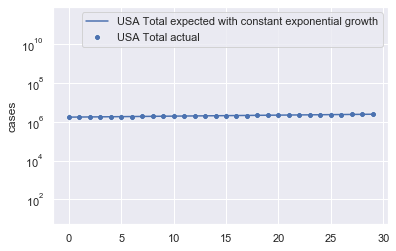

In [13]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [14]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 1749615.0 * exp(0.0119 * day)
fitted daily growth rate: 1.2 %, fitted days to doubling: 58.02
actual daily growth rate: 1.67 %, actual days to doubling: 41.56


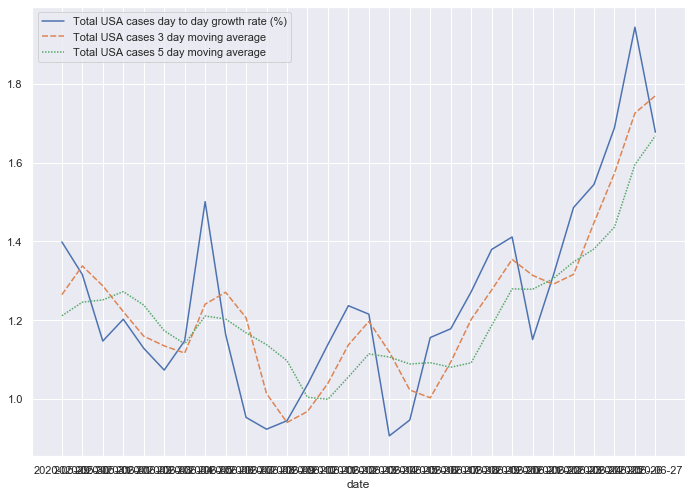

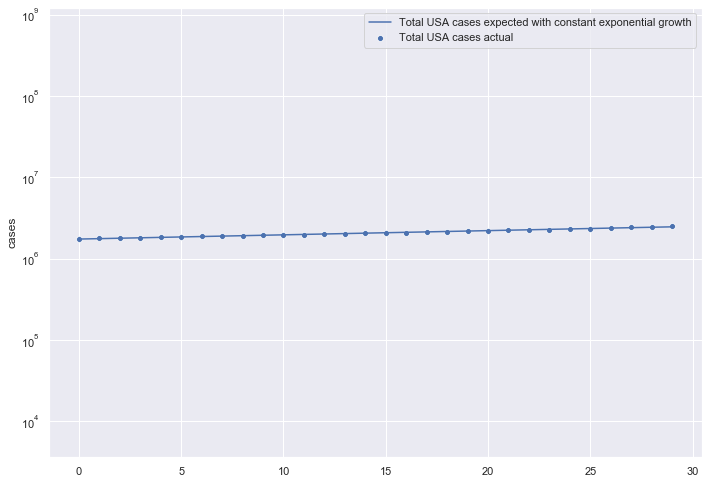

In [15]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

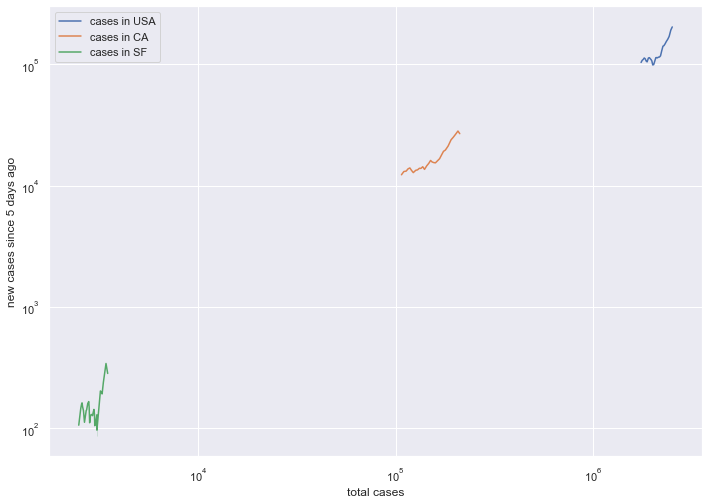

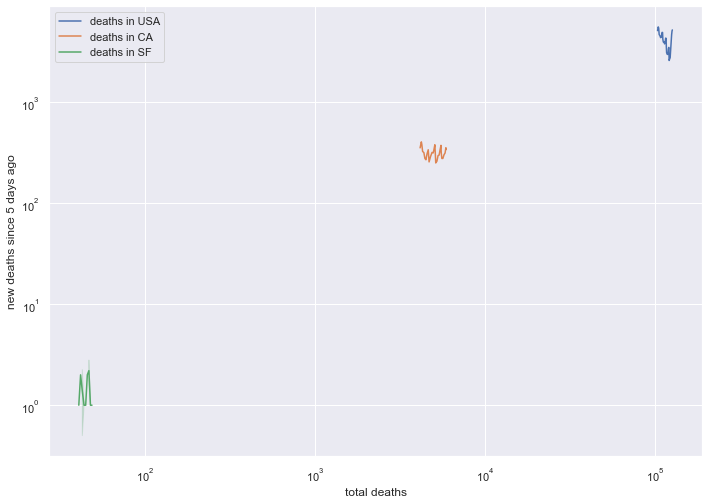

In [16]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [17]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [18]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [19]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
#         laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


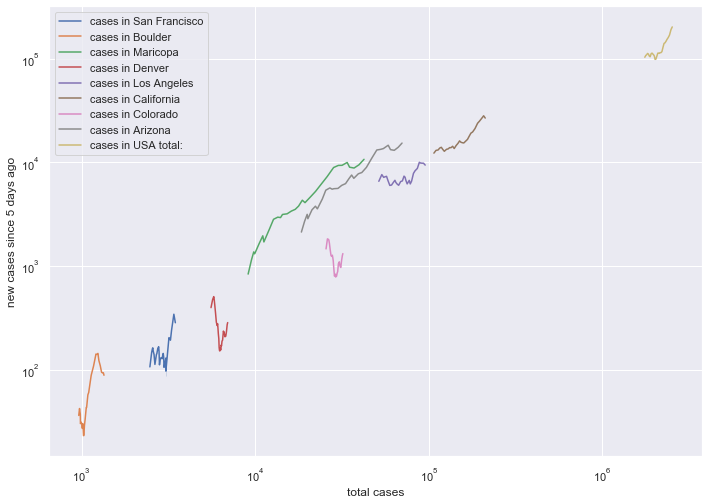

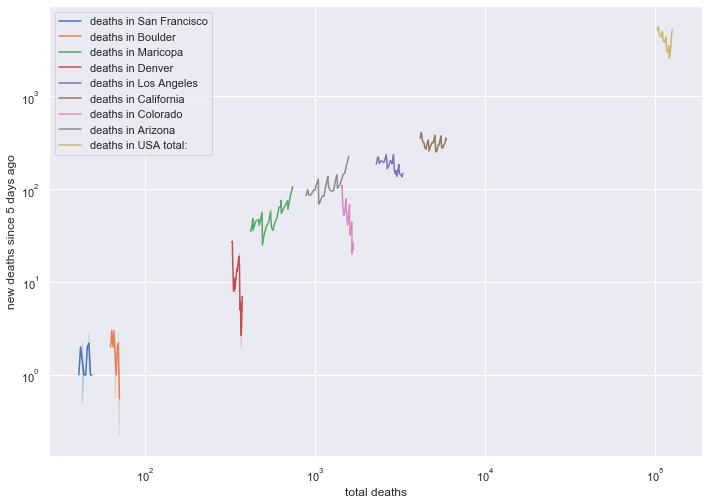


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 2490.68 * exp(0.0103 * day)
fitted daily growth rate: 1.03 %, fitted days to doubling: 67.48
actual daily growth rate: 1.68 %, actual days to doubling: 41.17


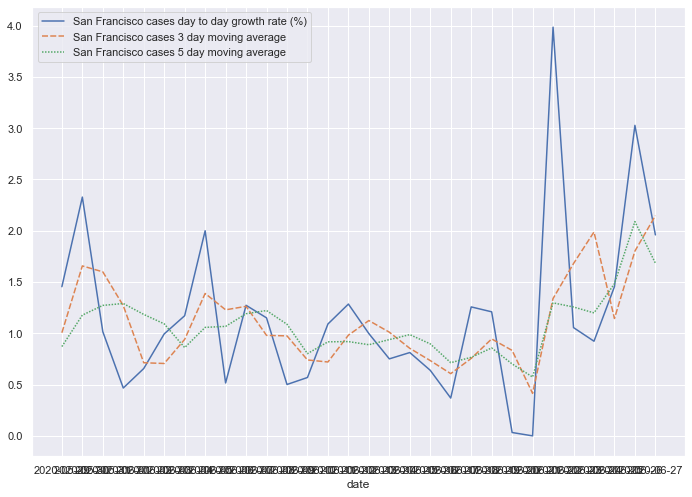

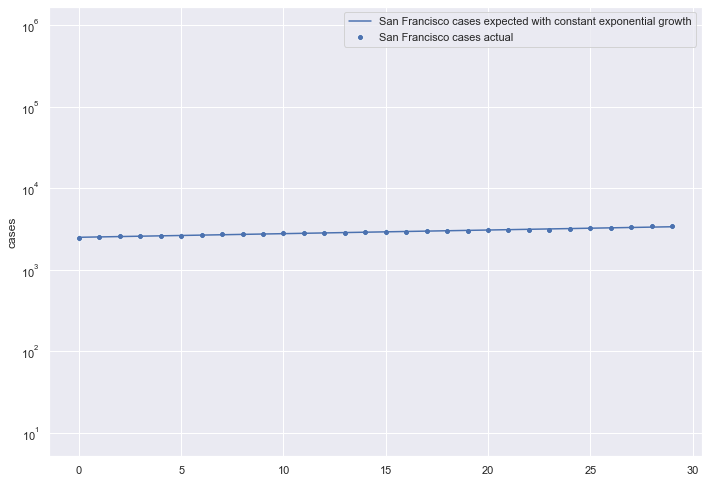

San Francisco deaths exponential formula fitted with 30 points:
deaths = 41.27 * exp(0.0058 * day)
fitted daily growth rate: 0.58 %, fitted days to doubling: 119.99
actual daily growth rate: 0.41 %, actual days to doubling: 169.82


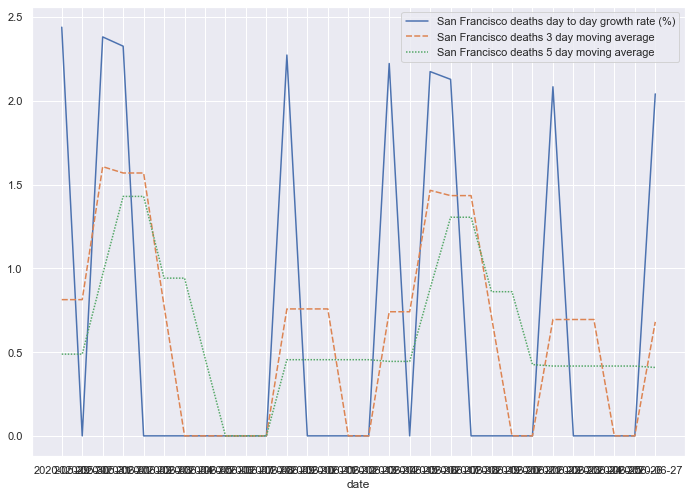

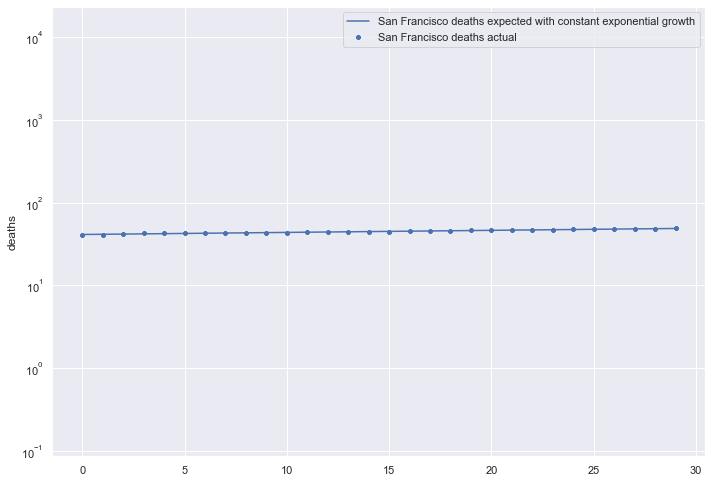

Trajectory plots for San Francisco, to see when the curve starts flattening


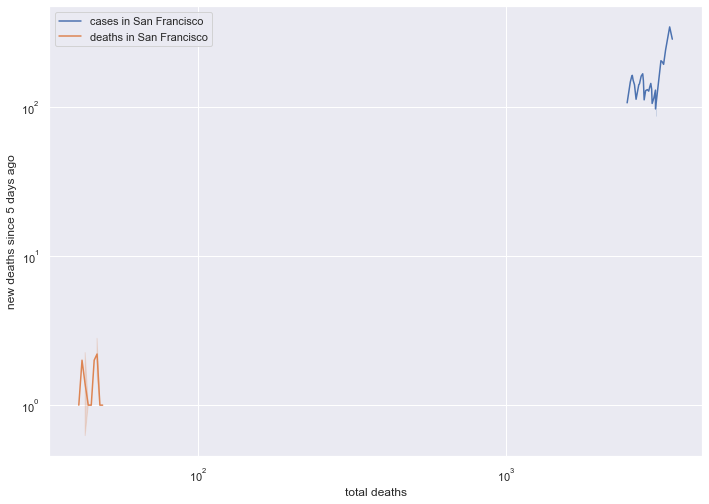


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 30 points:
cases = 924.2 * exp(0.0121 * day)
fitted daily growth rate: 1.22 %, fitted days to doubling: 57.16
actual daily growth rate: 1.34 %, actual days to doubling: 51.67


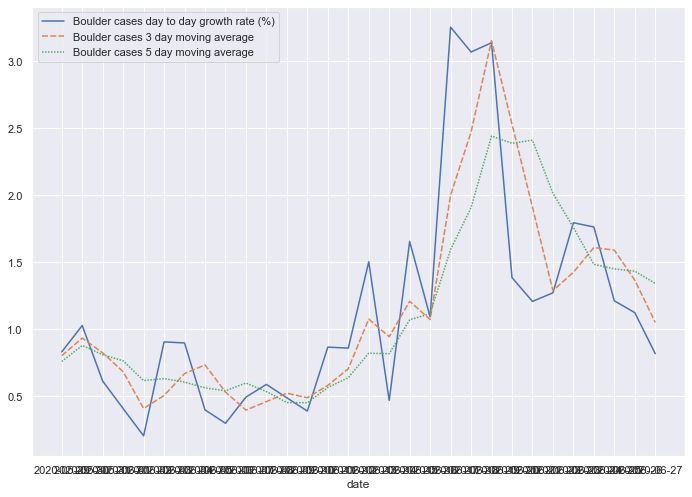

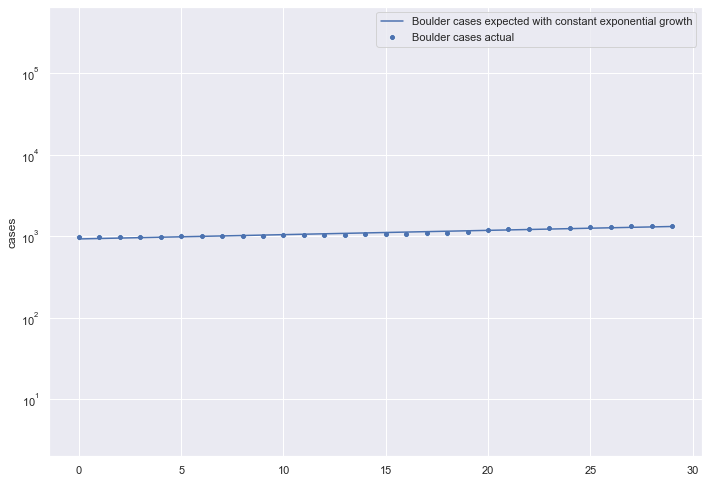

Boulder deaths exponential formula fitted with 30 points:
deaths = 64.89 * exp(0.0037 * day)
fitted daily growth rate: 0.37 %, fitted days to doubling: 187.82
actual daily growth rate: 0.0 %, actual days to doubling: inf


/usr/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


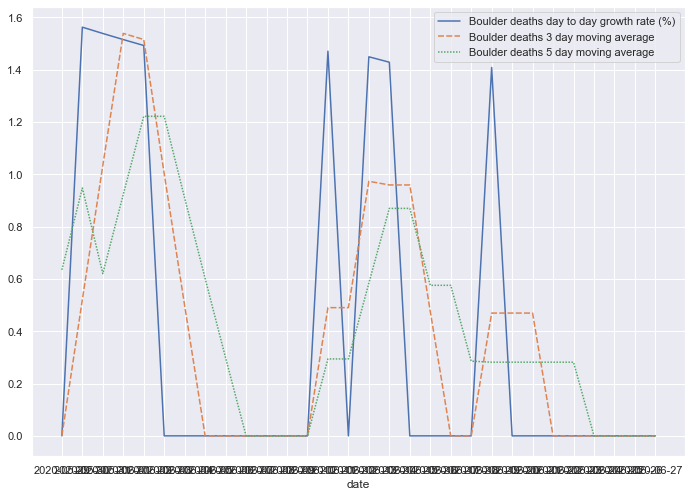

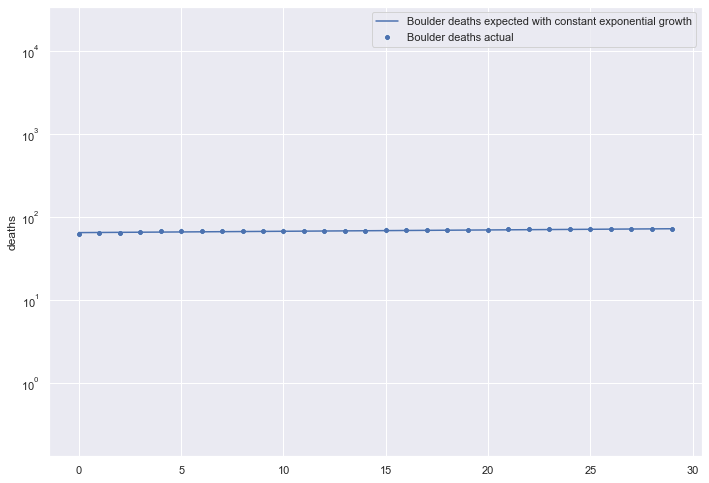

Trajectory plots for Boulder, to see when the curve starts flattening


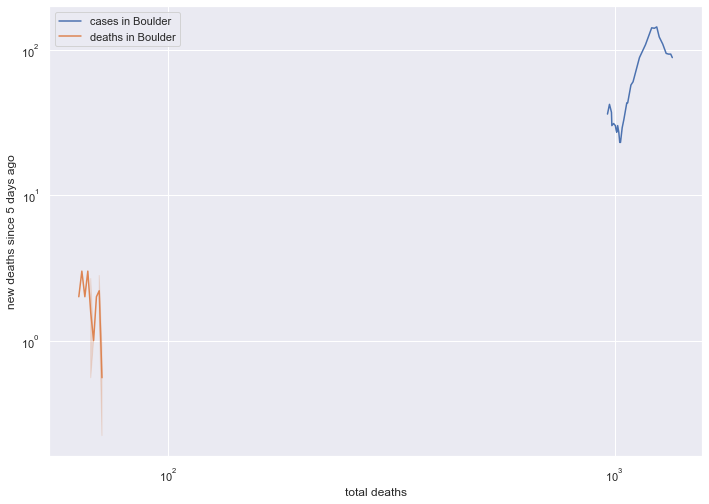


### Analysis for Maricopa ###

Maricopa cases exponential formula fitted with 30 points:
cases = 8338.9 * exp(0.0541 * day)
fitted daily growth rate: 5.56 %, fitted days to doubling: 12.81
actual daily growth rate: 5.66 %, actual days to doubling: 12.25


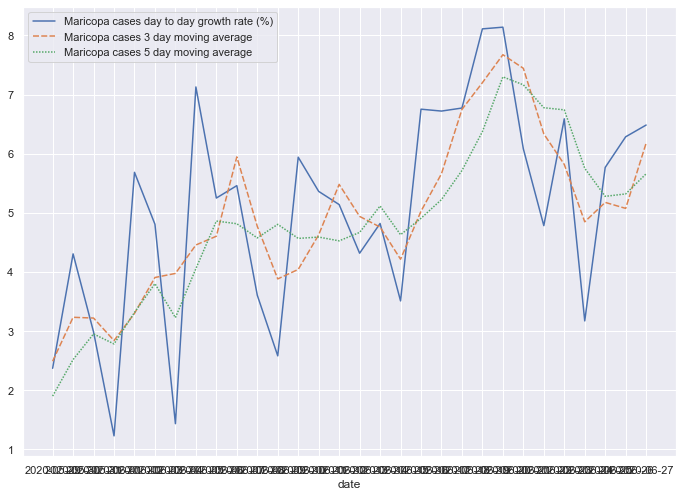

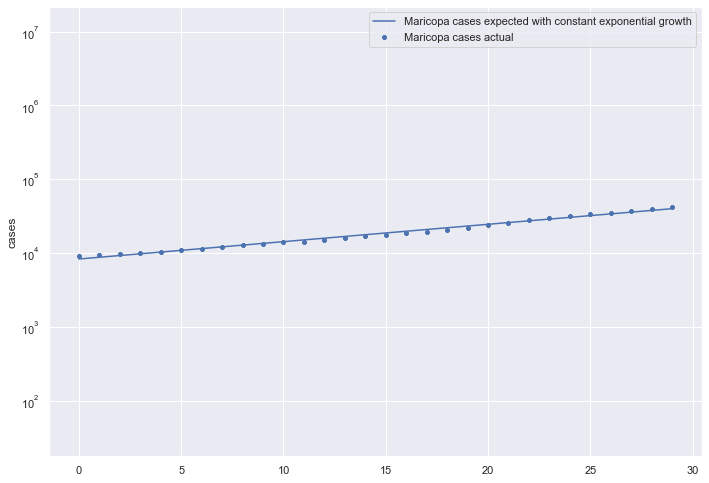

Maricopa deaths exponential formula fitted with 30 points:
deaths = 415.18 * exp(0.0187 * day)
fitted daily growth rate: 1.89 %, fitted days to doubling: 37.01
actual daily growth rate: 3.06 %, actual days to doubling: 22.64


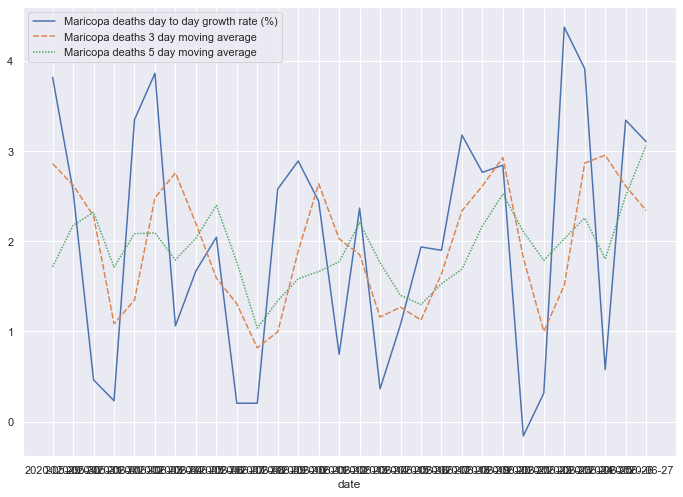

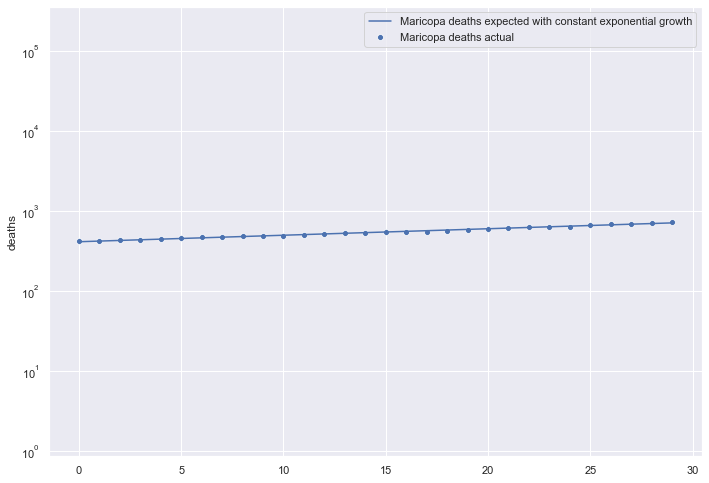

Trajectory plots for Maricopa, to see when the curve starts flattening


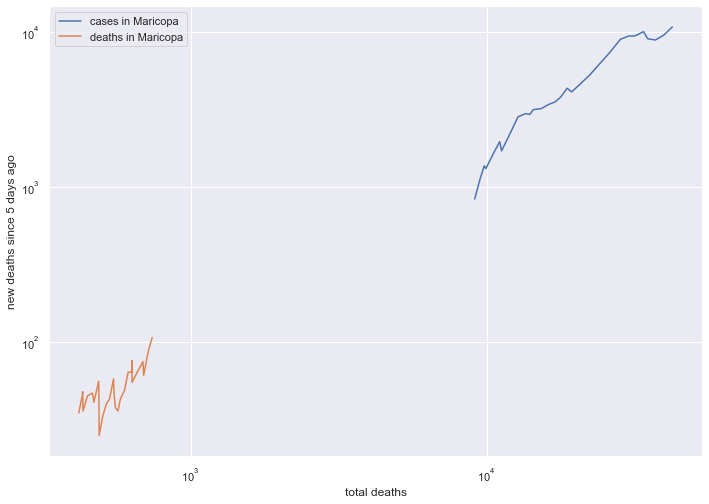


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 5699.94 * exp(0.0067 * day)
fitted daily growth rate: 0.67 %, fitted days to doubling: 103.36
actual daily growth rate: 0.83 %, actual days to doubling: 83.4


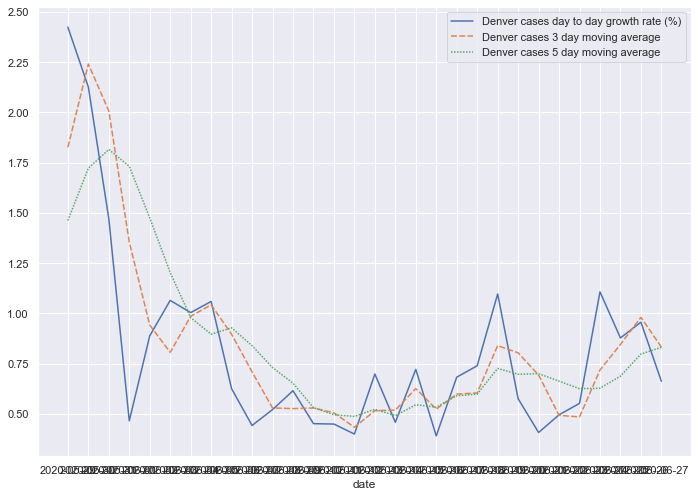

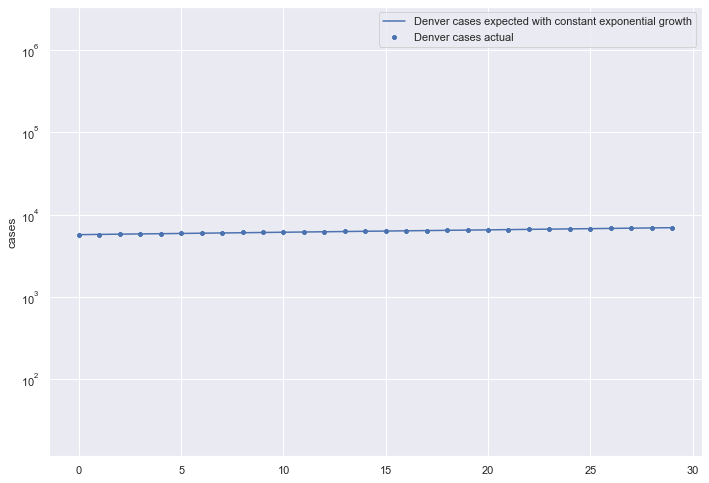

Denver deaths exponential formula fitted with 30 points:
deaths = 328.05 * exp(0.005 * day)
fitted daily growth rate: 0.51 %, fitted days to doubling: 137.58
actual daily growth rate: 0.38 %, actual days to doubling: 184.46


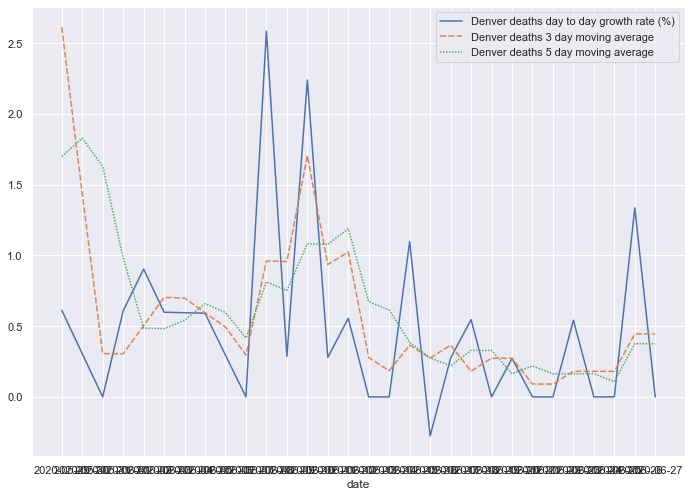

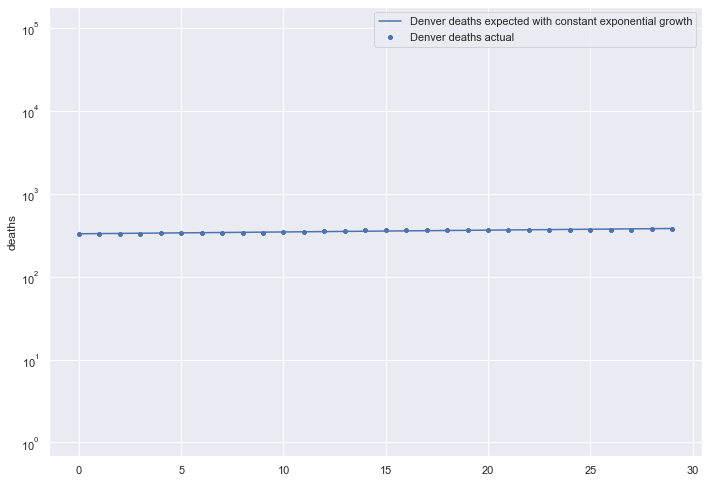

Trajectory plots for Denver, to see when the curve starts flattening


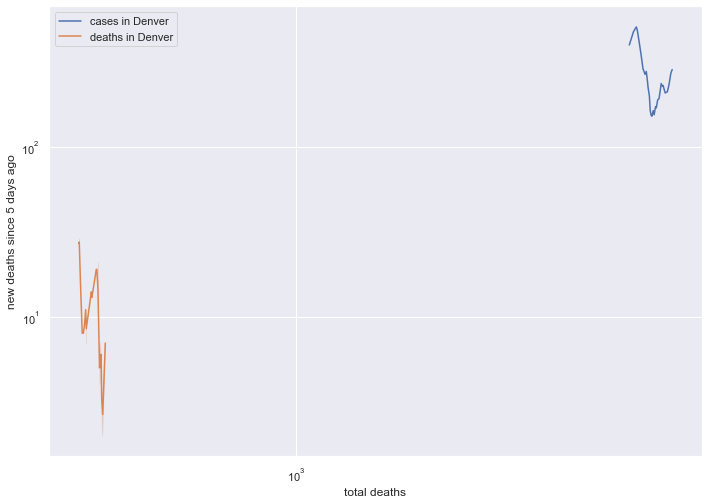


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 52609.67 * exp(0.0203 * day)
fitted daily growth rate: 2.06 %, fitted days to doubling: 34.06
actual daily growth rate: 2.06 %, actual days to doubling: 33.65


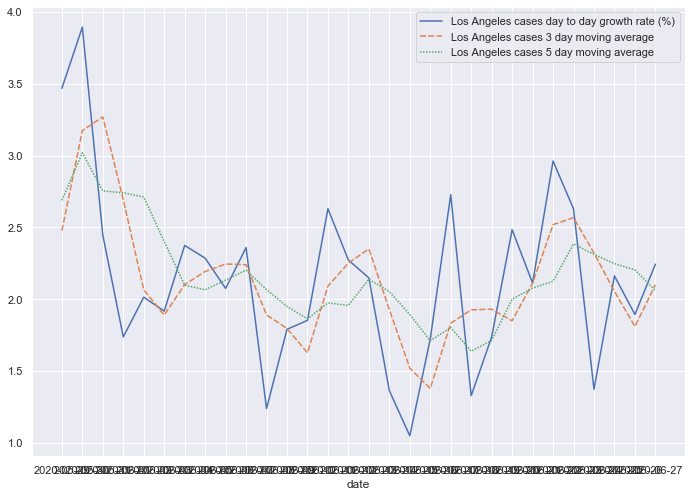

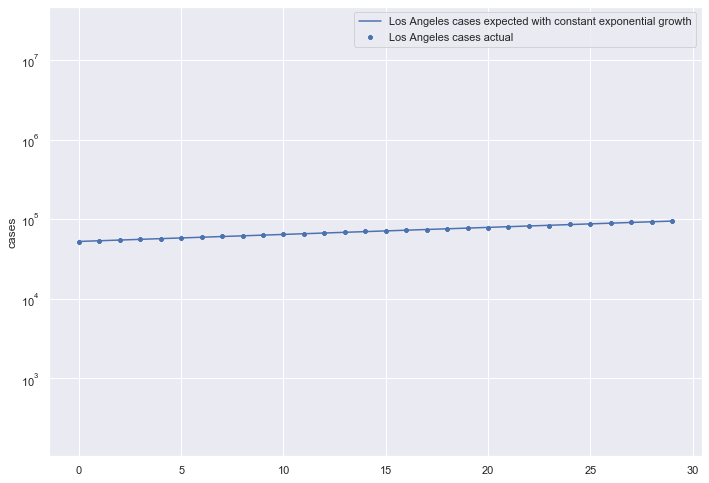

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 2342.87 * exp(0.0125 * day)
fitted daily growth rate: 1.26 %, fitted days to doubling: 55.46
actual daily growth rate: 0.92 %, actual days to doubling: 75.56


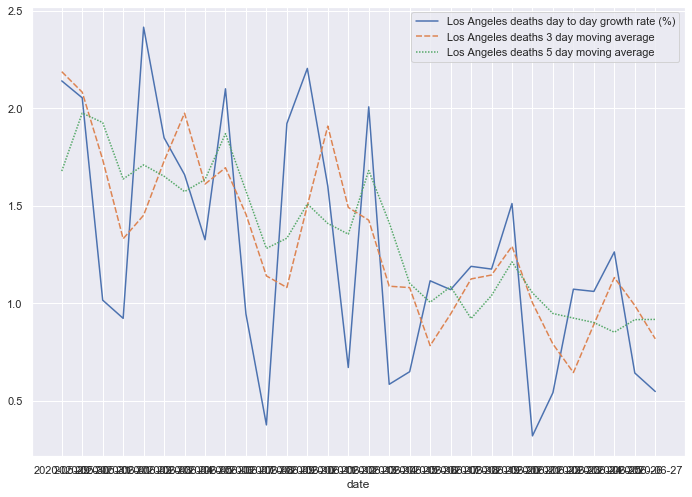

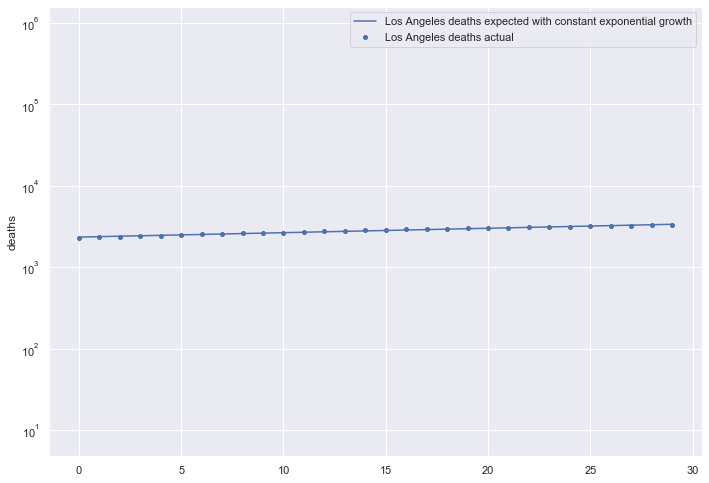

Trajectory plots for Los Angeles, to see when the curve starts flattening


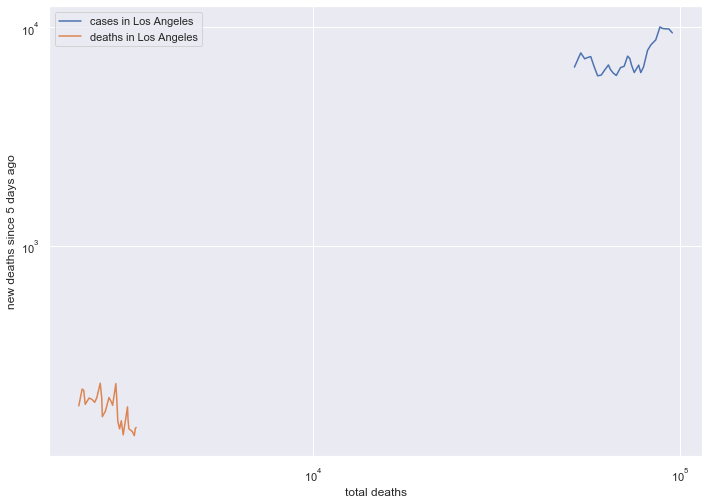


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 107120.47 * exp(0.0228 * day)
fitted daily growth rate: 2.31 %, fitted days to doubling: 30.38
actual daily growth rate: 2.68 %, actual days to doubling: 25.9


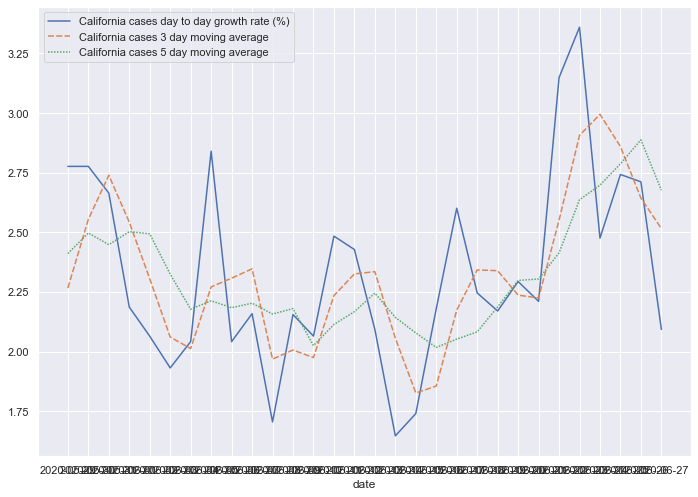

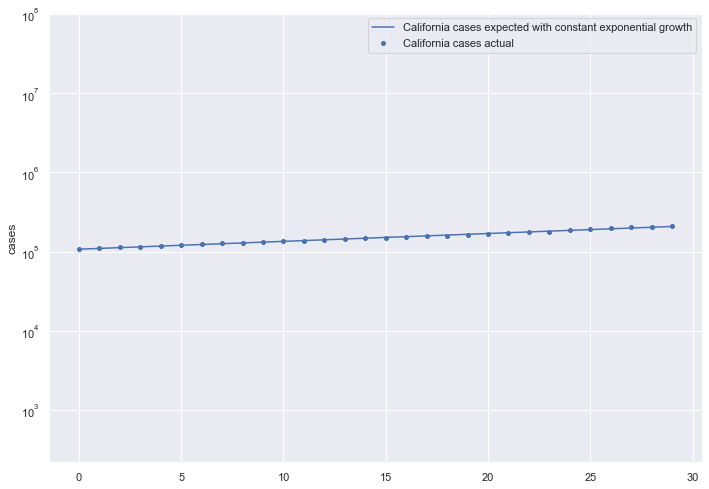

California deaths exponential formula fitted with 30 points:
deaths = 4164.44 * exp(0.0124 * day)
fitted daily growth rate: 1.24 %, fitted days to doubling: 56.12
actual daily growth rate: 1.18 %, actual days to doubling: 58.62


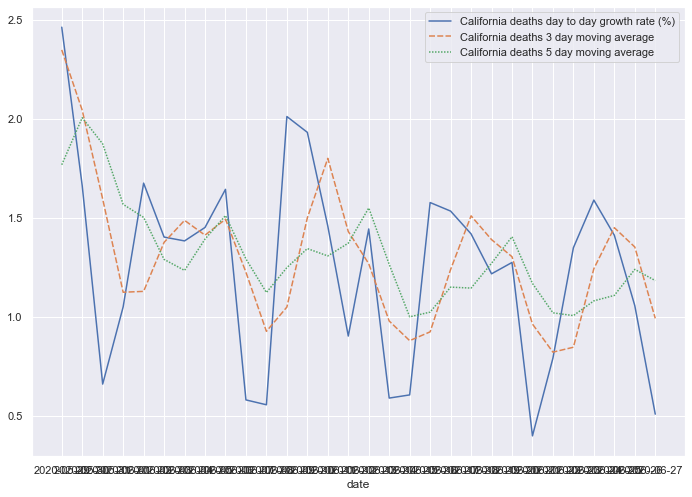

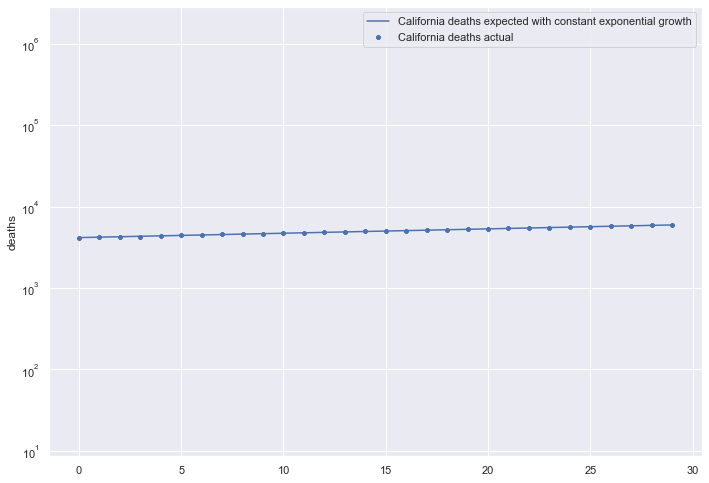

Trajectory plots for California, to see when the curve starts flattening


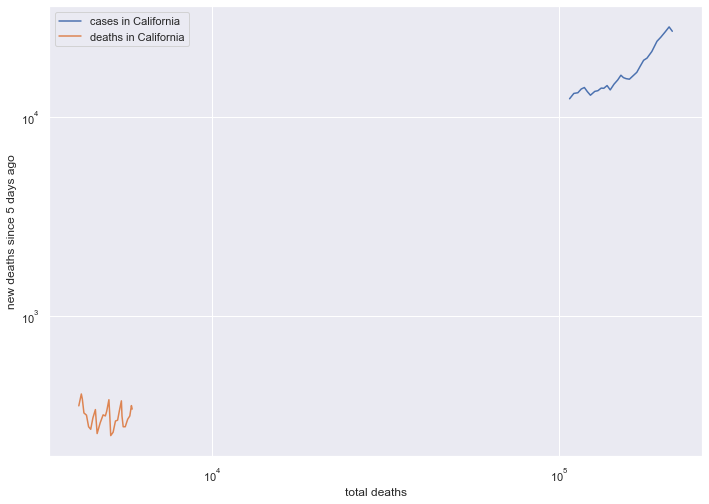


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 26079.91 * exp(0.007 * day)
fitted daily growth rate: 0.7 %, fitted days to doubling: 99.68
actual daily growth rate: 0.84 %, actual days to doubling: 82.84


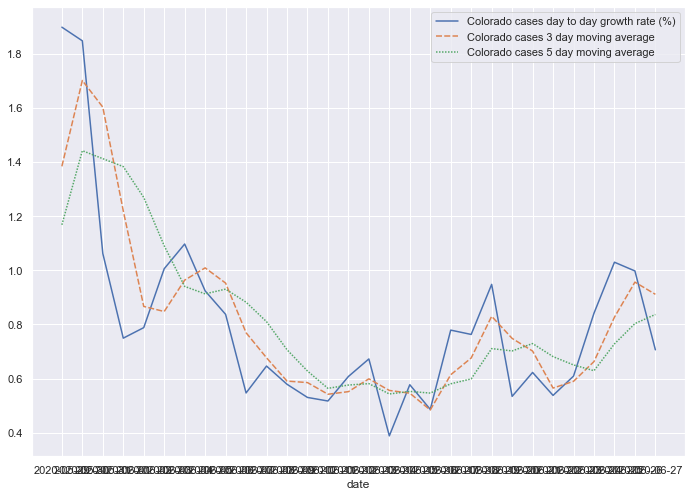

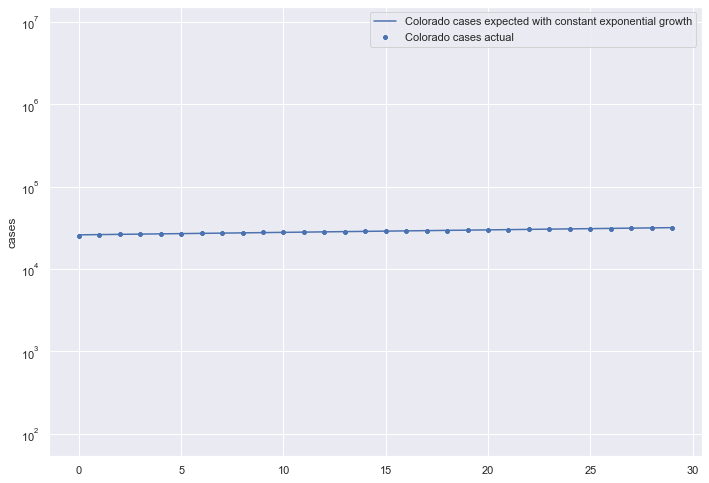

Colorado deaths exponential formula fitted with 30 points:
deaths = 1454.01 * exp(0.0055 * day)
fitted daily growth rate: 0.55 %, fitted days to doubling: 125.54
actual daily growth rate: 0.28 %, actual days to doubling: 251.24


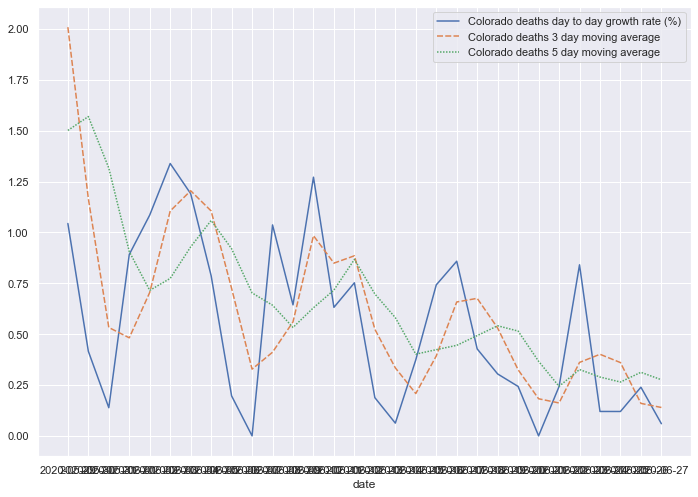

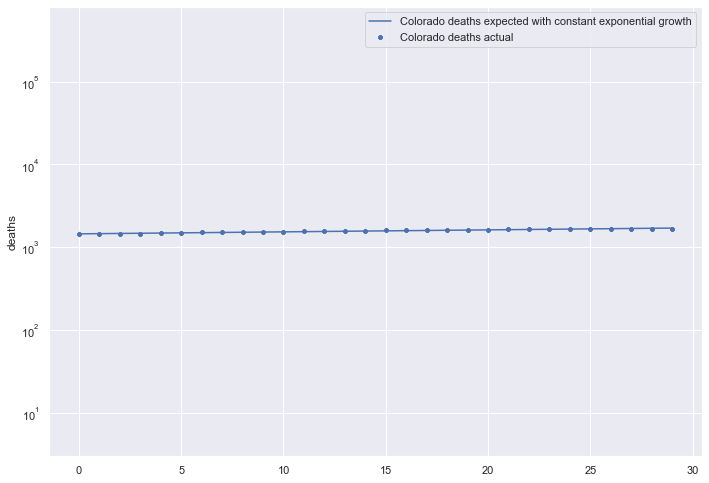

Trajectory plots for Colorado, to see when the curve starts flattening


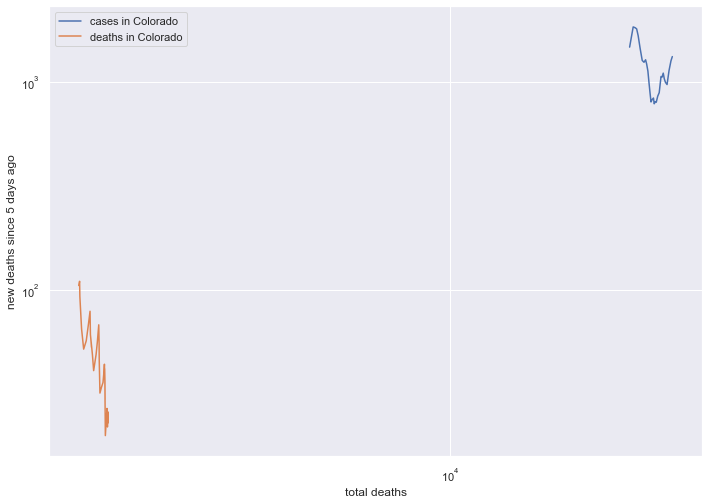


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 17551.35 * exp(0.0468 * day)
fitted daily growth rate: 4.79 %, fitted days to doubling: 14.82
actual daily growth rate: 4.83 %, actual days to doubling: 14.36


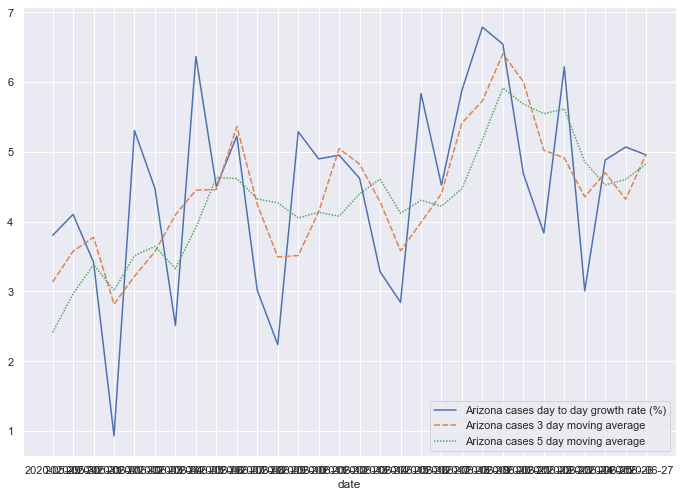

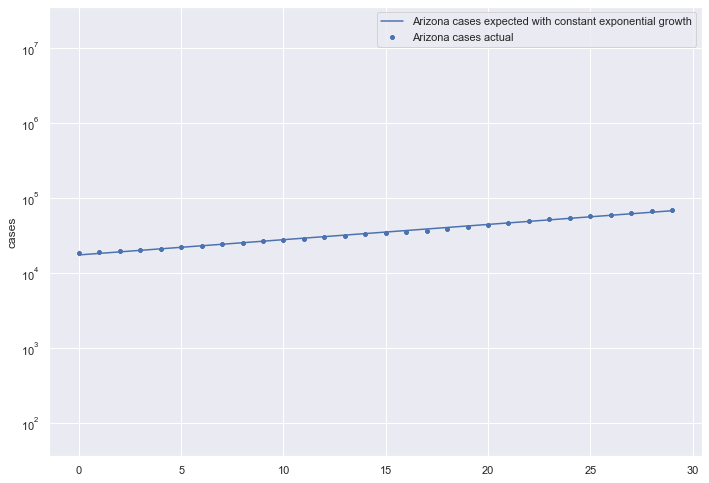

Arizona deaths exponential formula fitted with 30 points:
deaths = 879.07 * exp(0.0193 * day)
fitted daily growth rate: 1.95 %, fitted days to doubling: 35.97
actual daily growth rate: 3.05 %, actual days to doubling: 22.74


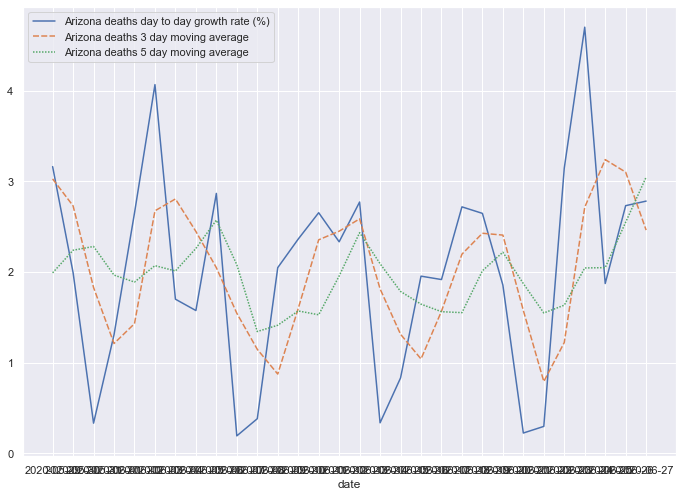

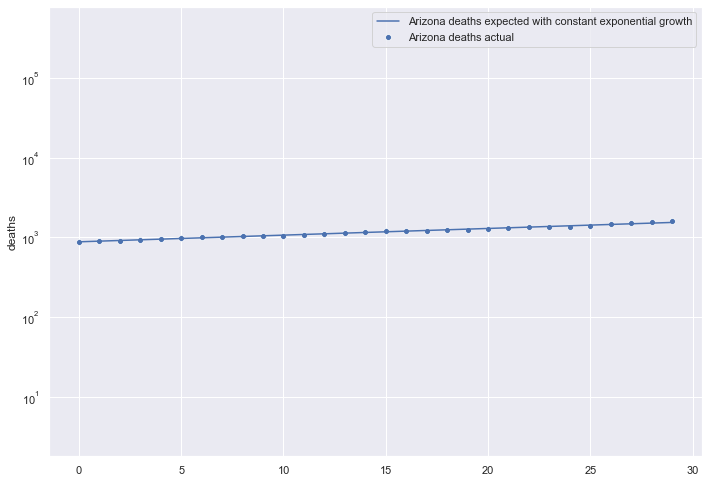

Trajectory plots for Arizona, to see when the curve starts flattening


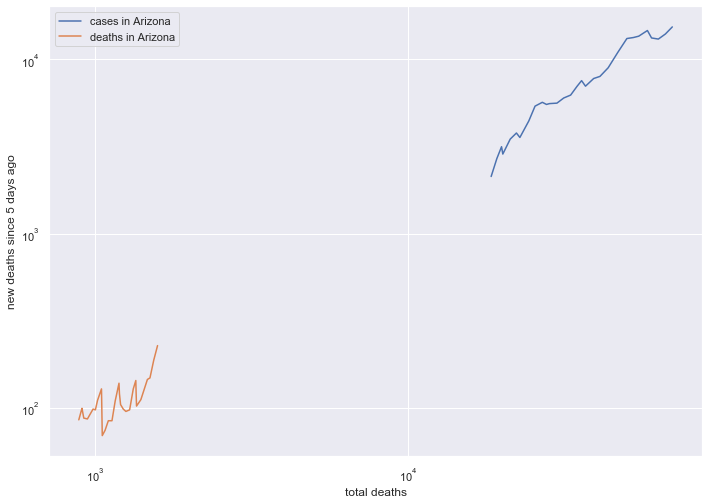


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 1749615.0 * exp(0.0119 * day)
fitted daily growth rate: 1.2 %, fitted days to doubling: 58.02
actual daily growth rate: 1.67 %, actual days to doubling: 41.56


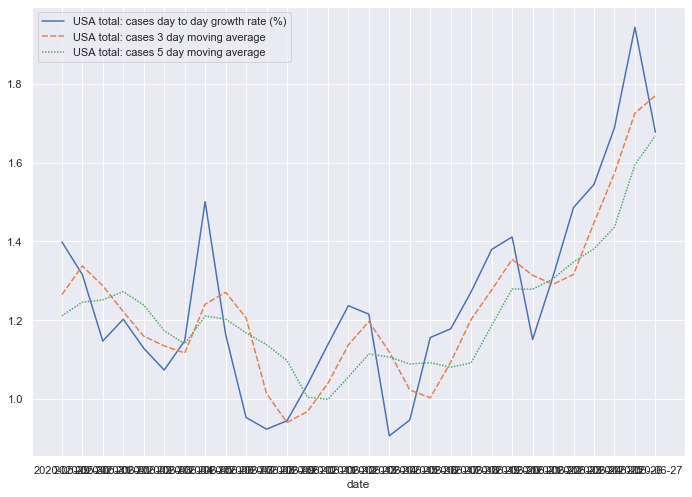

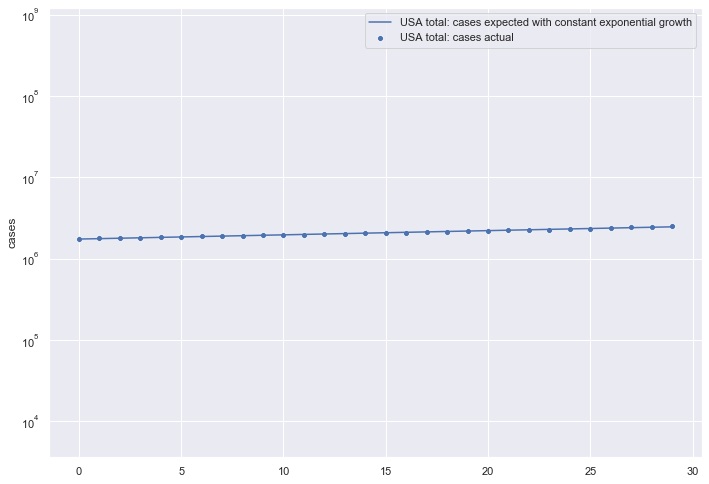

USA total: deaths exponential formula fitted with 30 points:
deaths = 103790.54 * exp(0.0066 * day)
fitted daily growth rate: 0.66 %, fitted days to doubling: 105.55
actual daily growth rate: 0.84 %, actual days to doubling: 82.18


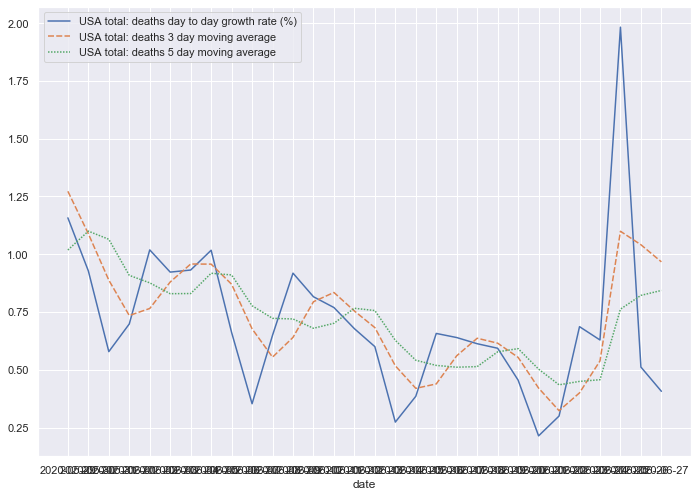

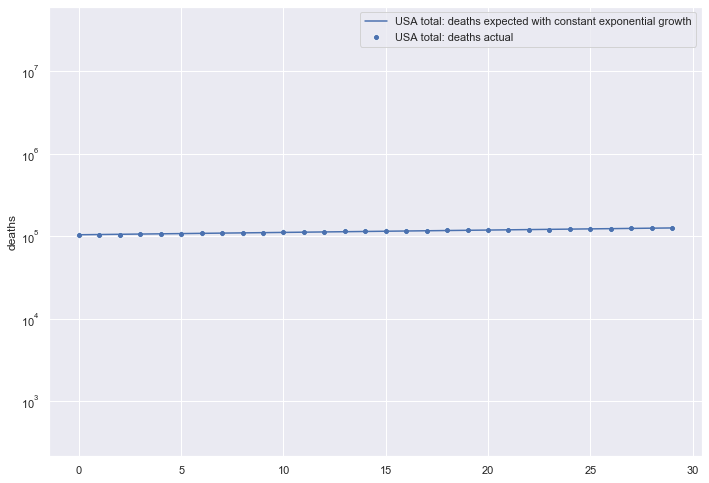

Trajectory plots for USA total:, to see when the curve starts flattening


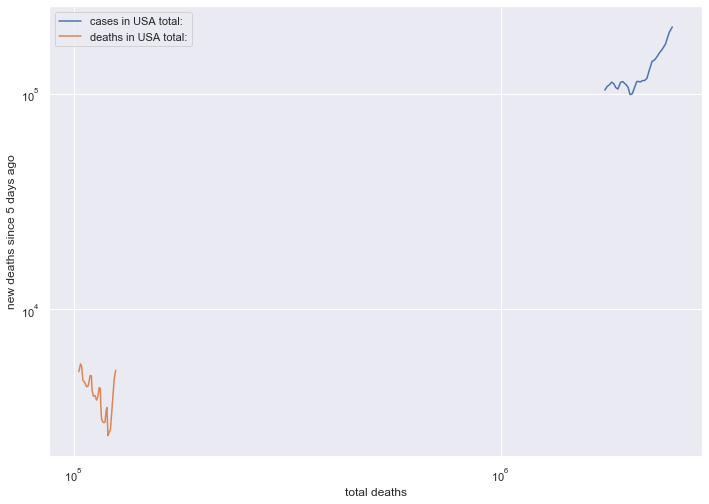

In [20]:
counties =["San Francisco", "Boulder", "Maricopa", "Denver", "Los Angeles"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)